
# **E-commerce Sales Data Analysis**

**Objective**

This project focuses on analyzing sales, profit, and customer segmentation data to derive actionable insights for business decision-making. The analysis aims to:
1. Identify the most and least profitable regions, categories, and sub-categories.
2. Analyze the impact of discounts on profitability.
3. Examine customer segmentation to determine its contribution to sales and profits.
4. Provide recommendations for improving shipping strategies and reducing losses.












---------------
## **1. Dataset Overview**



### 1.1. **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1.2. Loading The Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")
print(df.head())
df.shape

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

(9994, 13)

-------
## **2. Data Preparation**



### **2.1. Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### **2.2. Checking for missing values**

In [4]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


### **2.3. Handling Duplicates**

In [5]:
exact_duplicates = df[df.duplicated(keep=False)]
print(f"Total duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 17
Remaining duplicate rows: 0


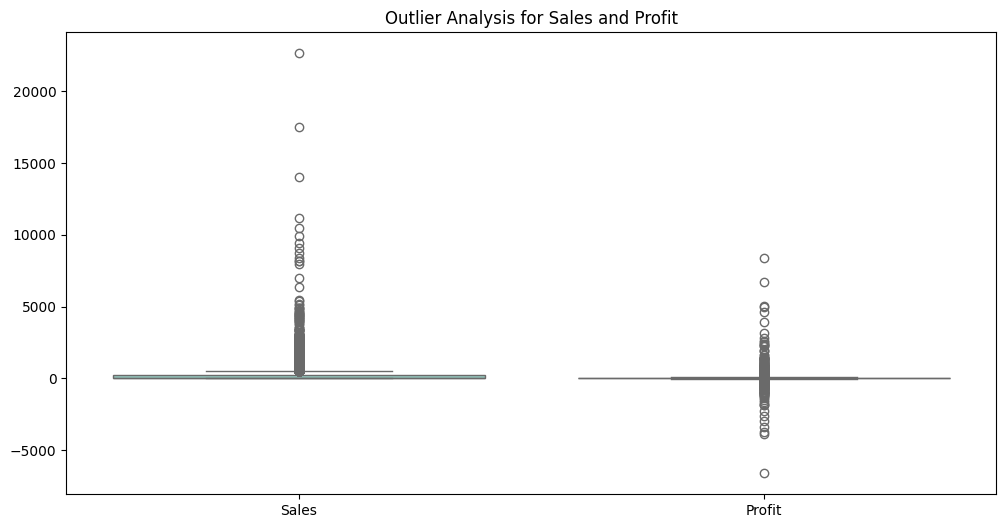

In [38]:
# Boxplot to check for outliers in Sales and Profit
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sales', 'Profit']], palette="Set3")
plt.title('Outlier Analysis for Sales and Profit')
plt.show()

### **2.4. Standardizing Data**
**Categorical Variables :**

In [17]:
categorical_columns = df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    df[column] = df[column].str.strip().str.lower()

**Numerical Data :**

In [16]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
for col in numerical_columns:
    df[col] = df[col].astype('float64')

---------------------

## **3. EXPLORATORY DATA ANALYSIS**



### **3.1. Statistical Summary**

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


### **3.2. Visual Analysis**


#### **3.2.1. Sales and Profit Analysis by Region**

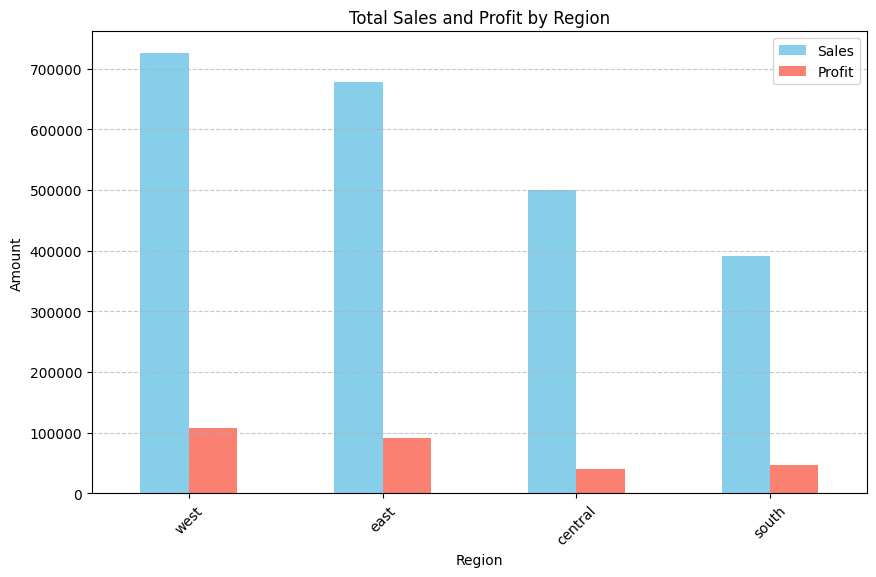

In [9]:
grouped_by_region = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
grouped_by_region.plot(kind="bar", color=["skyblue", "salmon"], figsize=(10, 6))
plt.title('Total Sales and Profit by Region')
plt.ylabel('Amount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Sales', 'Profit'])
plt.show()

A bar chart showed the total sales and profit for each region:



- **Observations:**

 - The West region leads in sales, followed by the East.
 - Central and South regions show lower sales and even lower profitability, indicating areas for improvement.

#### **3.2.2. Sales vs. Profit**

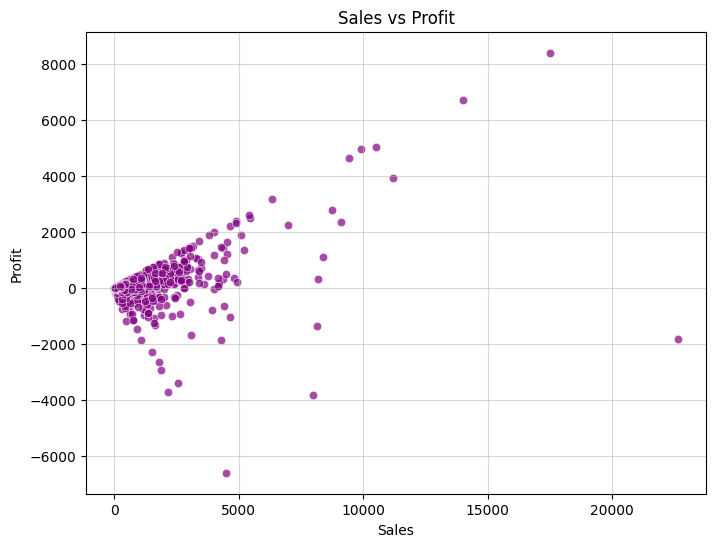

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Sales", y="Profit", color="purple", alpha=0.7)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(alpha=0.5)
plt.show()

A scatter plot analyzed the relationship between sales and profit:

- **Observations:**
 - Sales and profit generally show a positive correlation.
 - Certain points indicate high sales with negative profit, highlighting issues like excessive discounts or high costs.

#### **3.2.3. Impact of Discount on Profit for Categories**

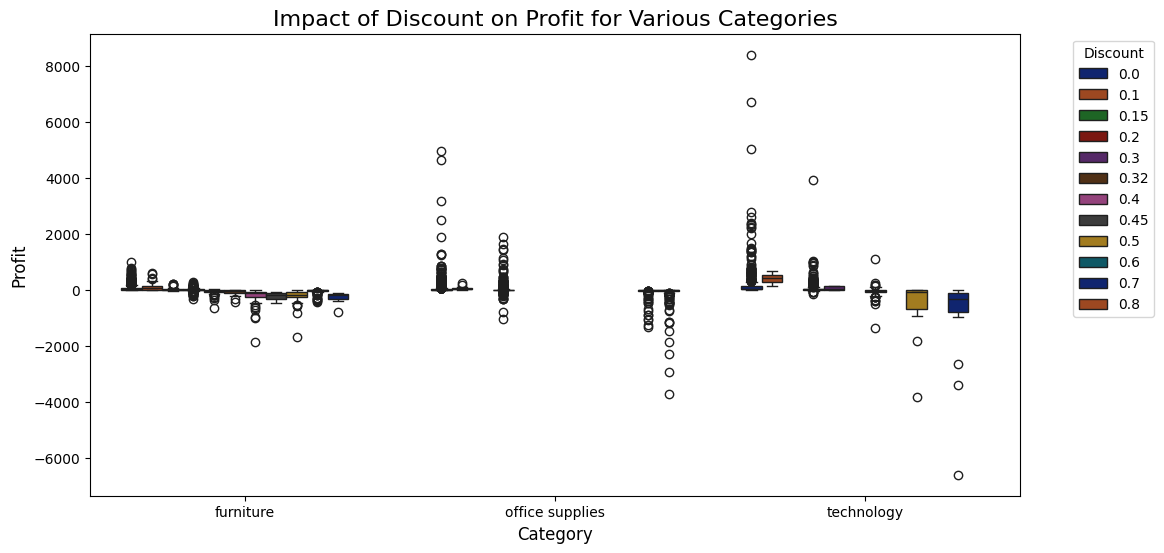

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Profit', hue='Discount', palette="dark")
plt.title('Impact of Discount on Profit for Various Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Discount', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Box plots analyzed profit trends by category under varying discount levels:

- **Observations:**
 - Discounts appear to have the most negative impact on furniture profits.
 - Technology seems to be the least affected category by discounts.

 The box plot highlights the need for careful discount management to maintain profitability across furniture, office supplies, and technology.


#### **3.2.4. Discount Trends with Sales and Profit**

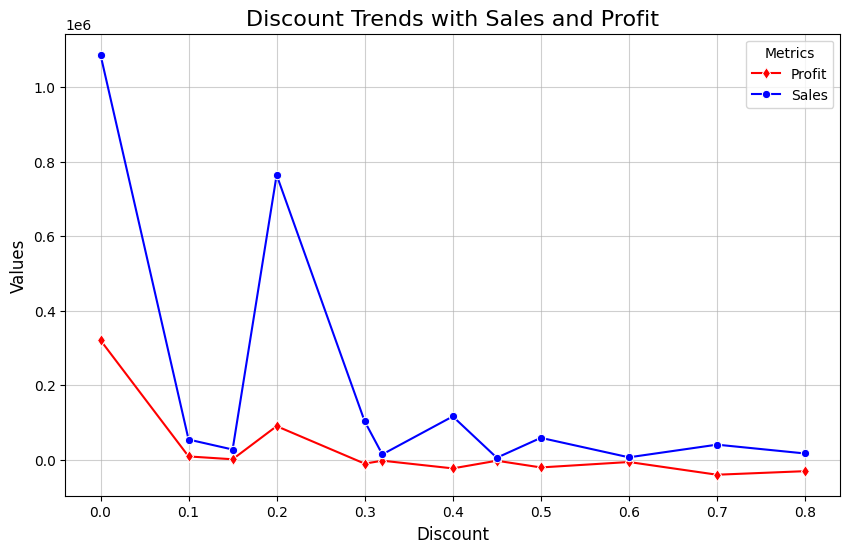

In [45]:
discount_trends = df.groupby("Discount").agg({"Sales": "sum", "Profit": "sum"}).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=discount_trends, x="Discount", y="Profit", marker="d", color="r", label="Profit")
sns.lineplot(data=discount_trends, x="Discount", y="Sales", marker="o", color="b", label="Sales")
plt.title('Discount Trends with Sales and Profit', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(title='Metrics')
plt.grid(alpha = 0.6)
plt.show()

A line plot revealed the trends of sales and profit across different discount levels:

- **Observations:**
 - Discounts beyond 20% sharply reduce profits, especially for Furniture and Office Supplies.

### **3.3. Detailed Segment Analysis**

#### **3.3.1. Category and Sub-Category Analysis**

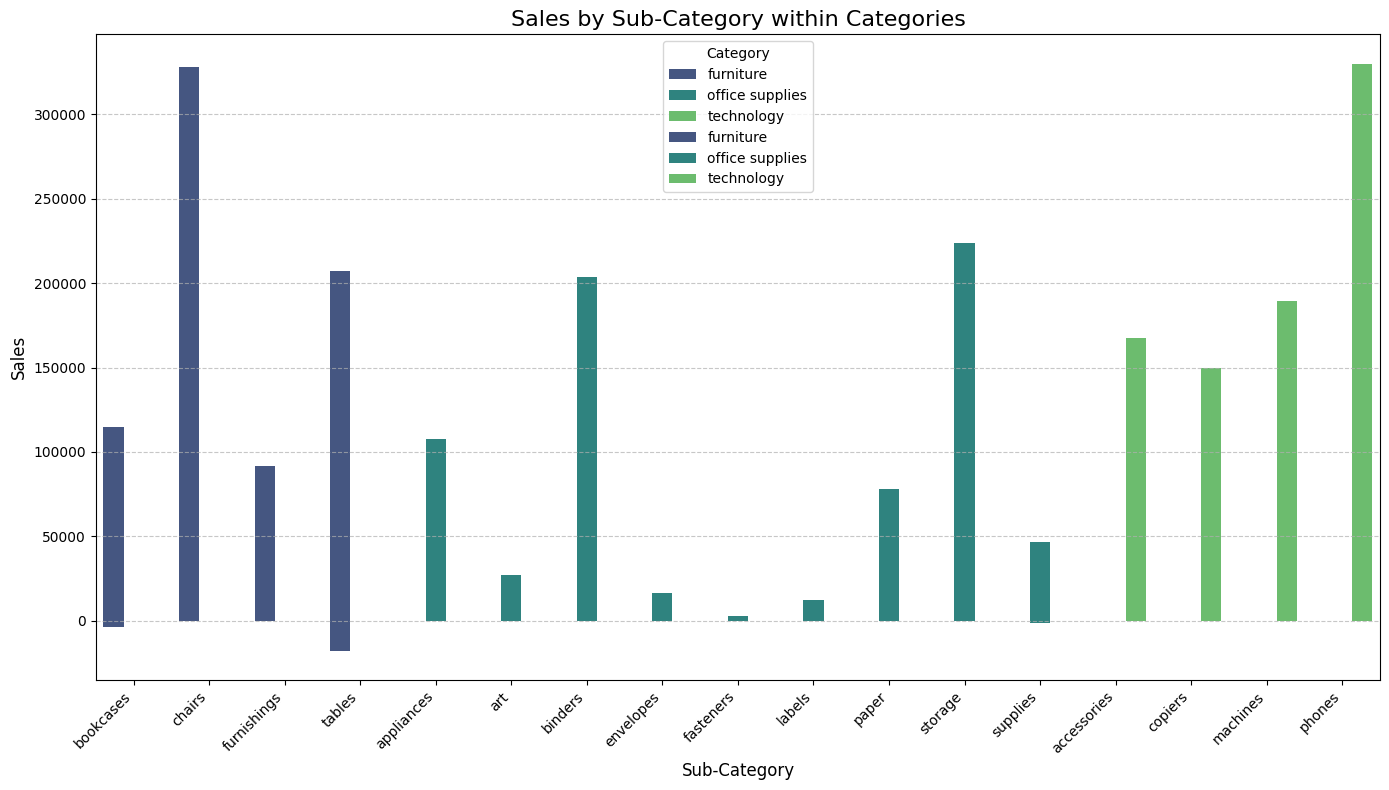

In [23]:
category_data = df.groupby(['Category', 'Sub-Category'])[['Sales', "Profit"]].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=category_data, x='Sub-Category', y='Sales', hue='Category', dodge=True, palette='viridis')
sns.barplot(data=category_data, x='Sub-Category', y='Profit', hue='Category', dodge=True, palette='viridis')
plt.title('Sales by Sub-Category within Categories', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

A bar plot visualized sales by sub-category within categories:



- **Observations:**
 - Phones dominate sales in the Technology category.
 - Sub-categories like Bookcases and Tables in Furniture need attention due to lower profitability.

In [41]:
# Analyzing Sub-Categories with Negative Profit
negative_profit_subcategories = category_data[category_data['Profit'] < 0]
print("Sub-Categories with consistent losses:")
print(negative_profit_subcategories)

Sub-Categories with consistent losses:
           Category Sub-Category        Sales      Profit
0         furniture    bookcases  114879.9963  -3472.5560
3         furniture       tables  206965.5320 -17725.4811
12  office supplies     supplies   46673.5380  -1189.0995


#### **3.3.2. Segment-wise Analysis**

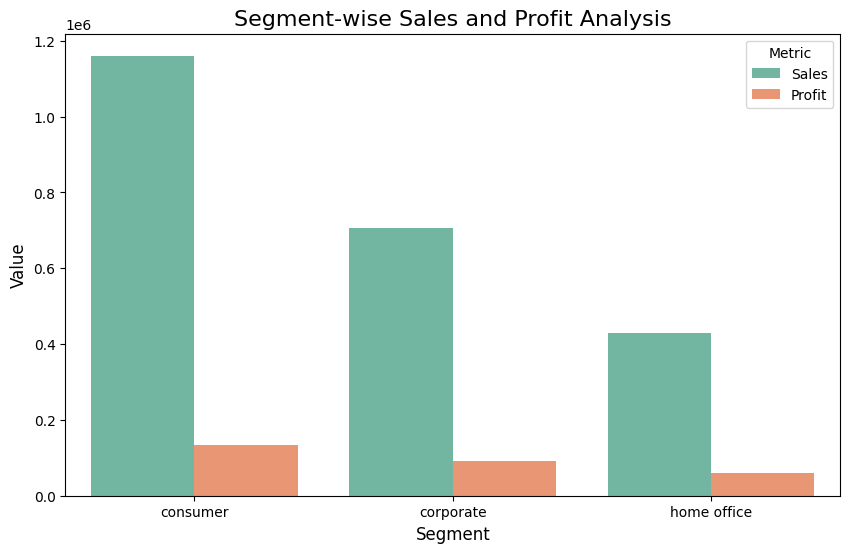

In [27]:
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_data.melt(id_vars='Segment', var_name='Metric', value_name='Value'),
            x='Segment', y='Value', hue='Metric', palette='Set2')
plt.title('Segment-wise Sales and Profit Analysis', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Metric', fontsize=10)
plt.show()

Bar plots compared sales and profit for each customer segment:

- **Observations:**
 - The Consumer segment is the most profitable.

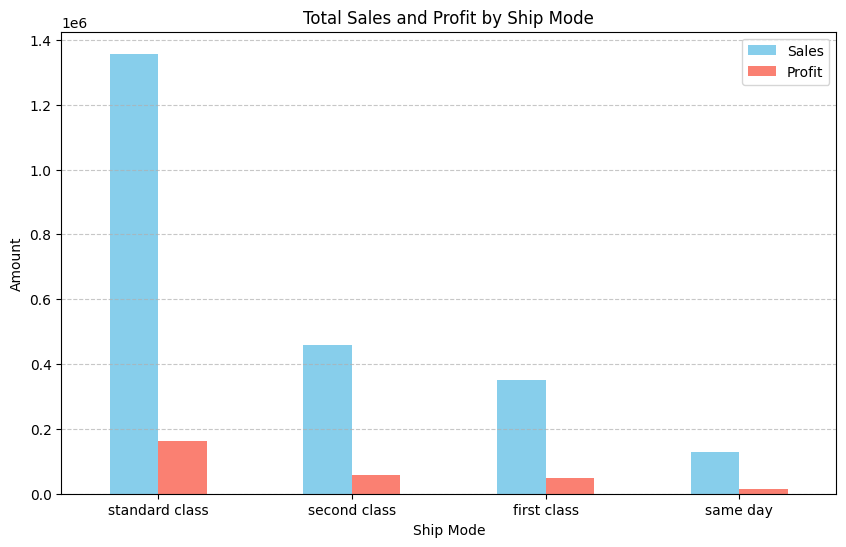

In [52]:
grouped_by_region = df.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
grouped_by_region.plot(kind="bar", color=["skyblue", "salmon"], figsize=(10, 6))
plt.title('Total Sales and Profit by Ship Mode')
plt.ylabel('Amount')
plt.xlabel('Ship Mode')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Sales', 'Profit'])
plt.show()

Bar plots compared sales and profit for each customer segment:

- **Observations:**

 - Standard Class is the dominant shipping mode for both sales and profit.
 - Optimization in shipping costs or pricing strategies could enhance profitability.

### **3.4. Correlation Heatmap**

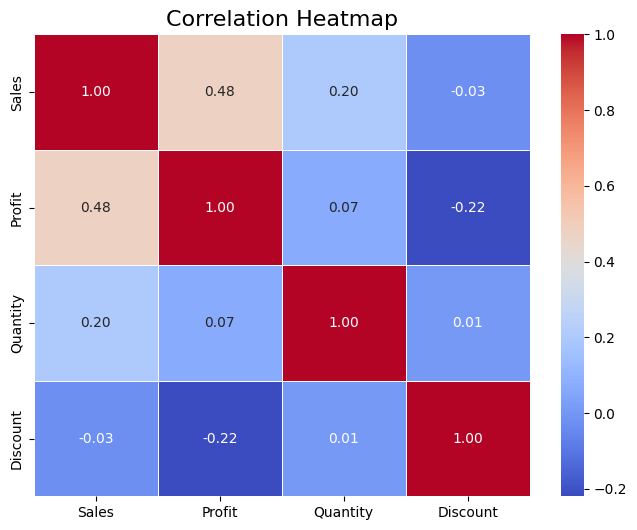

In [15]:
numeric_columns = ['Sales', 'Profit', 'Quantity', 'Discount']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

The heatmap revealed relationships between numerical variables:

- **Observations:**
 - Sales and profit are moderately correlated, but discounts have a negative correlation with profit.
 - This confirms that higher discounts lead to declining profitability.